In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement des données

circonscriptions_2018 = pd.read_csv("data/2018/circonscriptions.csv", encoding="ISO-8859-1", sep=";")
votes_candidats_2018 = pd.read_csv("data/2018/candidats.csv", encoding="ISO-8859-1", sep=";")

In [3]:
# Affichage des titres de chacune des colonnes

print(circonscriptions_2018.columns)
print(votes_candidats_2018.columns)

Index(['Numéro de la circonscription', 'Nom de la circonscription',
       'Dernière date de mise à jour au format ISO 8601', 'Résultats finaux',
       'Nombre de bureaux complétés', 'Nombre total de bureaux',
       'Nombre de votes valides', 'Nombre de votes rejetés',
       'Nombre de votes exercés', 'Nombre d'électeurs inscrits',
       'Taux de vote valide', 'Taux de vote rejeté', 'Taux de participation'],
      dtype='object')
Index(['Numéro de la circonscription', 'Numéro du candidat', 'Nom', 'Prénom',
       'Numéro du parti politique', 'Abréviation du parti politique',
       'Nombre total de votes', 'Taux de vote', 'Nombre de votes en avance'],
      dtype='object')


In [4]:
# Affichage des cinq premières lignes, histoire de voir de quoi les données ont l'air

circonscriptions_2018.head()

,Numéro de la circonscription,Nom de la circonscription,Dernière date de mise à jour au format ISO 8601,Résultats finaux,Nombre de bureaux complétés,Nombre total de bureaux,Nombre de votes valides,Nombre de votes rejetés,Nombre de votes exercés,Nombre d'électeurs inscrits,Taux de vote valide,Taux de vote rejeté,Taux de participation
0,648,Abitibi-Est,"2018-10-17T10:10:42,609-04:00",True,125,125,20991,551,21542,33770,97.44,2.56,63.79
1,642,Abitibi-Ouest,"2018-10-17T10:10:42,609-04:00",True,139,139,22509,372,22881,35339,98.37,1.63,64.75
2,338,Acadie,"2018-10-17T10:10:42,609-04:00",True,162,162,26591,406,26997,49838,98.50,1.50,54.17
3,366,Anjou-Louis-Riel,"2018-10-17T10:10:42,609-04:00",True,137,137,27654,505,28159,43666,98.21,1.79,64.49
4,520,Argenteuil,"2018-10-17T10:10:42,609-04:00",True,158,158,30477,457,30934,47351,98.52,1.48,65.33


In [5]:
# La colonne de mise à jour au format ISO 8601 n'est pas utile pour le travail à venir, tout comme le booléen pour les résultats finaux

circonscriptions_2018 = circonscriptions_2018.drop(columns=['Dernière date de mise à jour au format ISO 8601', 'Résultats finaux'])

# Afin d'alléger le reste de la prodécure, je renomme une des colonnes

votes_candidats_2018 = votes_candidats_2018.rename(columns={'Abréviation du parti politique': 'Parti politique'})

In [6]:
# Vérification de l'intégrité des données

# Il devrait normalement y avoir 125 lignes, une par circonscription électorale au Québec, et les colonnes Numéro et Nom de la circonscriptions devraient êtres uniques

print("Nombre de circonscriptions(lignes) dans le dataset : ", len(circonscriptions_2018))
numero_unique = circonscriptions_2018['Numéro de la circonscription'].is_unique
nom_unique = circonscriptions_2018['Nom de la circonscription'].is_unique

print("Les numéros de circonscriptions sont-ils uniques? ", numero_unique)
print("Les noms de circonscriptions sont-ils uniques? ", nom_unique)

Nombre de circonscriptions(lignes) dans le dataset :  125
Les numéros de circonscriptions sont-ils uniques?  True
Les noms de circonscriptions sont-ils uniques?  True


In [7]:
# Quelles sont les circonscriptions avec le plus haut et le plus faible taux de participation?
# On commence d'abord par isoler les colonnes utiles, ici le nom de la circonscription et le taux de participation

taux_participation_2018 = (circonscriptions_2018.iloc[:,[1,10]]).sort_values(by='Taux de participation', ascending=False)

# Ensuite on divise en quintile, en ajoutant +1 pour avoir des quintiles de 1 à 5 plutôt que de 0 à 4
taux_participation_2018['quintile'] = pd.qcut(taux_participation_2018['Taux de participation'], q=5, labels=False) + 1

# On affiche toutes les circonscriptions du quintile avec le taux de participation le plus élevé
print("Les circonscriptions se trouvant dans le quintile avec le plus haut taux de participation sont : ")
print(taux_participation_2018[taux_participation_2018['quintile'] == 5])
print("-------------------------------------------------------------------------------------------------")

# Ensuite celle dans le dernier quintile
print("Les circonscriptions se trouvant dans le quintile avec le plus bas taux de participation sont : ")
print(taux_participation_2018[taux_participation_2018['quintile'] == 1])

Les circonscriptions se trouvant dans le quintile avec le plus haut taux de participation sont : 
    Nom de la circonscription  Taux de participation  quintile
66               Louis-Hébert                  80.52         5
78                Montarville                  80.37         5
120                 Verchères                  77.38         5
27     Chutes-de-la-Chaudière                  76.63         5
14                    Borduas                  76.41         5
18                    Chambly                  75.35         5
48                 Jean-Talon                  75.16         5
58                 La Prairie                  74.85         5
12                 Blainville                  74.56         5
91                 Repentigny                  74.21         5
113                Taschereau                  73.74         5
21               Charlesbourg                  73.37         5
71                     Masson                  72.86         5
44       Îles-de-la-

In [8]:
# Trouver candidat vainqueur pour chaque circonscription (votes en avance plus grand que zéro)

vainqueurs_2018 = votes_candidats_2018[votes_candidats_2018['Nombre de votes en avance'] > 0]

In [9]:
# Trouver le résultats des élection en terme de nombre de candidats élus

candidats_elus_parparti_2018 = vainqueurs_2018['Parti politique'].value_counts()

print(candidats_elus_parparti_2018.to_string())

Parti politique
C.A.Q.-É.F.L.    74
P.L.Q./Q.L.P.    31
P.Q.             10
Q.S.             10


Parti politique
A.P.Q.               521
B.P.                4657
C.A.Q.-É.F.L.    1509455
C.I.N.Q.             693
C.P.Q.             13768
Ind                 6462
N.P.D.Q.           22863
P.C.Q./C.P.Q.      59055
P.Cu.Q.              169
P.L.                1678
P.L.Q./Q.L.P.    1001037
P.M.L.Q.            1708
P.N.                3659
P.Q.              687995
P.V.Q./G.P.Q.      67870
P51                 1117
Q.S.              649503
V.P.                 190
É.A.                1138
Name: Nombre total de votes, dtype: int64


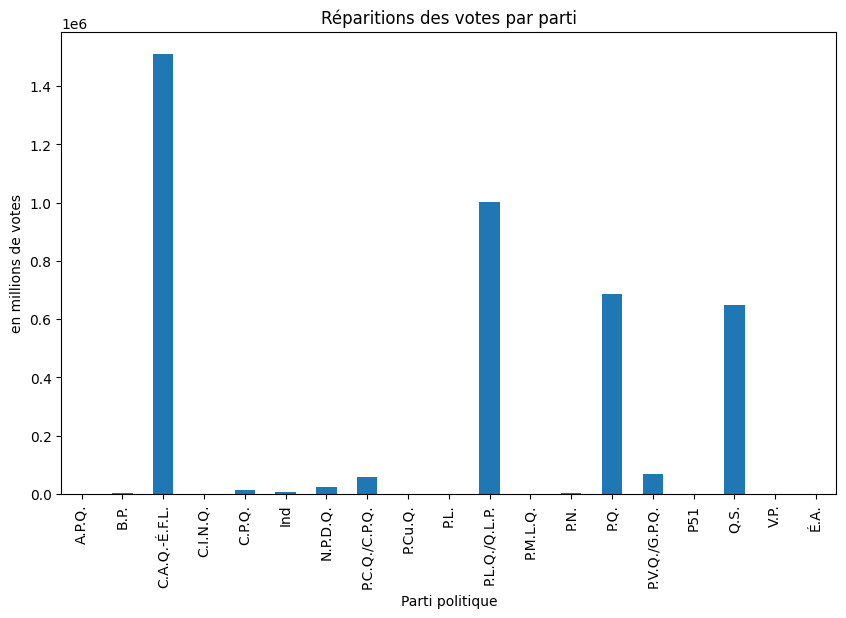

In [10]:
# Maintenant le résultat des élections, en nombre de votes par parti

total_votes_parparti_2018 = votes_candidats_2018.groupby('Parti politique')['Nombre total de votes'].sum()
print(total_votes_parparti_2018)
total_votes_parparti_2018.plot(kind='bar', figsize=(10, 6))
plt.title("Réparitions des votes par parti")
plt.ylabel("en millions de votes")
plt.show()

In [11]:
# Intéressant à regarder: la différence entre le résultat du vote populaire versus les sièges obtenus.
# Le vote populaire étant le suffrage effectivement reçu.  Cela nous donnerait une idée de ce que serait la répartition
# des partis si on changerait le mode électoral pour quelque chose de plus portionnel.  J'en profite pour signaler une
# initiative pancanadienne qui milite pour ce genre de chose : https://www.fairvote.ca/fr/

total_sieges_2018 = candidats_elus_parparti_2018.values.sum()
proportion_sieges_2018 = candidats_elus_parparti_2018 / total_sieges_2018 * 100

print("Proportion des sièges obtenus (en pourcentage) : ")
print(proportion_sieges_2018)

print("Proportion des votes reçus (en pourcentage : ")
proportion_vote_2018 = total_votes_parparti_2018 / total_votes_parparti_2018.sum() * 100
print(proportion_vote_2018)

Proportion des sièges obtenus (en pourcentage) : 
Parti politique
C.A.Q.-É.F.L.    59.2
P.L.Q./Q.L.P.    24.8
P.Q.              8.0
Q.S.              8.0
Name: count, dtype: float64
Proportion des votes reçus (en pourcentage : 
Parti politique
A.P.Q.            0.012917
B.P.              0.115457
C.A.Q.-É.F.L.    37.422605
C.I.N.Q.          0.017181
C.P.Q.            0.341338
Ind               0.160207
N.P.D.Q.          0.566822
P.C.Q./C.P.Q.     1.464099
P.Cu.Q.           0.004190
P.L.              0.041601
P.L.Q./Q.L.P.    24.817840
P.M.L.Q.          0.042345
P.N.              0.090714
P.Q.             17.056862
P.V.Q./G.P.Q.     1.682642
P51               0.027693
Q.S.             16.102563
V.P.              0.004711
É.A.              0.028213
Name: Nombre total de votes, dtype: float64


In [12]:
# Avec un vote proportionnel donc, la composition de l'Assemblée Nationale serait très différente, le gouvernement élu
# serait notamment minoritaire.

In [13]:
# Trouver le candidat élu avec le moins de votes

elu_moinsdevotes_2018 = vainqueurs_2018.loc[vainqueurs_2018['Nombre total de votes'].idxmin()]
print(elu_moinsdevotes_2018)

Numéro de la circonscription              938
Numéro du candidat                       1344
Nom                                   Lamothe
Prénom                                  Denis
Numéro du parti politique                  27
Parti politique                 C.A.Q.-É.F.L.
Nombre total de votes                    2270
Taux de vote                            26.51
Nombre de votes en avance                  46
Name: 866, dtype: object


In [14]:
vainqueurs_2018 = votes_candidats_2018[votes_candidats_2018['Nombre de votes en avance'] > 0]
print(circonscriptions_2018[circonscriptions_2018['Numéro de la circonscription'] == 938])

     Numéro de la circonscription Nom de la circonscription  \
116                           938                    Ungava   

     Nombre de bureaux complétés  Nombre total de bureaux  \
116                          115                      115   

     Nombre de votes valides  Nombre de votes rejetés  \
116                     8564                      182   

     Nombre de votes exercés  Nombre d'électeurs inscrits  \
116                     8746                        28314   

     Taux de vote valide  Taux de vote rejeté  Taux de participation  
116                97.92                 2.08                  30.89  


In [15]:
# Tâchons de comparer maintenant tous les candidats vainqueurs par le nombre de votes obtenus

vainqueurs_triespartotalvotes_2018 = vainqueurs_2018[['Prénom', 'Nom', 'Nombre total de votes']].sort_values(by='Nombre total de votes', ascending=False)
vainqueurs_triespartotalvotes_2018['nom complet'] = vainqueurs_triespartotalvotes_2018['Prénom'] + ' ' + vainqueurs_triespartotalvotes_2018['Nom']

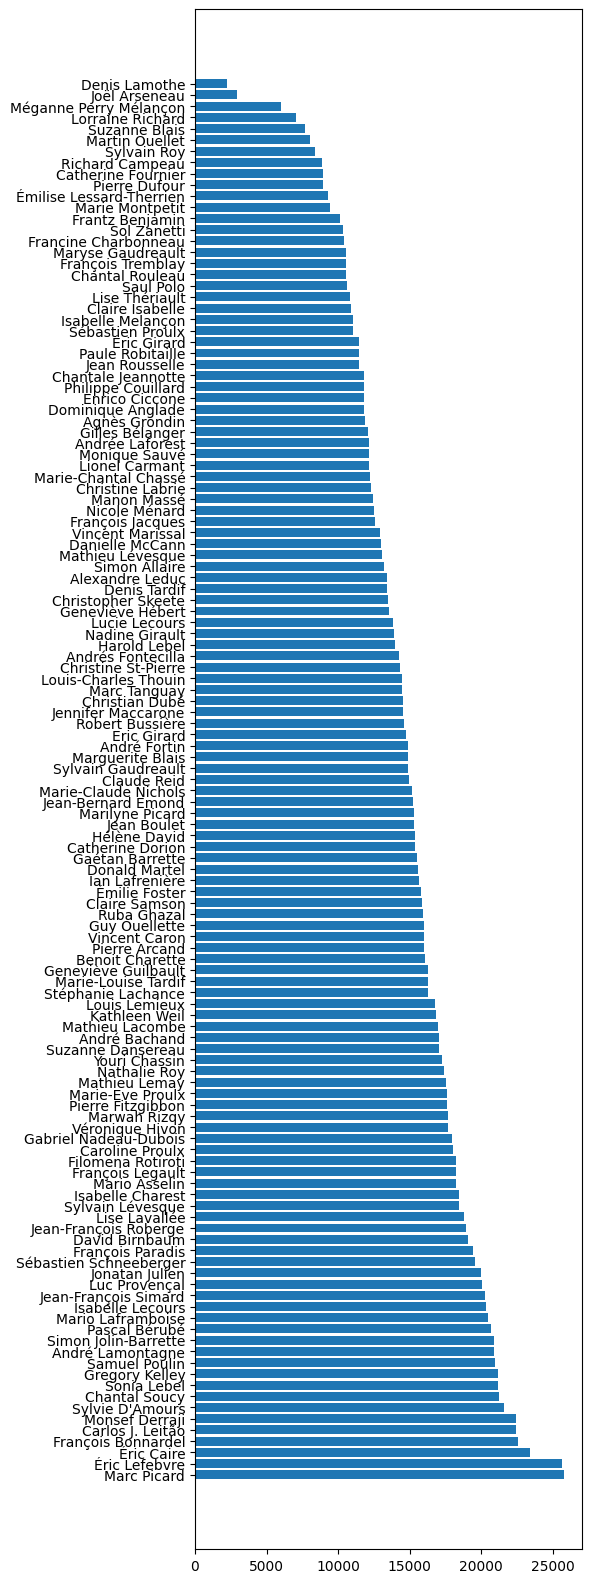

In [17]:
plt.figure(figsize=(5, 20))
plt.barh(vainqueurs_triespartotalvotes_2018['nom complet'], vainqueurs_triespartotalvotes_2018['Nombre total de votes'])
plt.show()

In [18]:
# Ceci dit étant donné que les circonscriptions n'ont pas toute le même nombre d'électeurs. Le résultat précédent
# n'est pas aussi intéressant qu'il en a l'air, surtout si on ajoute le fait que le taux de participation est vraiment inégal.

In [20]:
# Regardons maintenant le taux de vote pour le candidat gagnant dans chacune des circonscriptions et le nombre de votes en 
# avance pour le vainqueur dans chacune d'elles.

comparaison_avance_taux_partaux_2018 = vainqueurs_2018[['Numéro de la circonscription', 'Nombre de votes en avance', 'Taux de vote']].sort_values(by='Taux de vote')
comparaison_avance_taux_paravance_2018 = vainqueurs_2018[['Numéro de la circonscription', 'Nombre de votes en avance', 'Taux de vote']].sort_values(by='Nombre de votes en avance')

print("Les cinq circonscriptions avec le plus bas taux de vote.")

print(comparaison_avance_taux_partaux_2018.head())

# Il semble y avoir une tendance à avoir moins d'avance lorsque le taux de vote est plus bas, ce qui a du sens quand on y 
# pense.

print("\nLes cinq circonscriptions avec le plus haut taux de vote.")

print(comparaison_avance_taux_partaux_2018.tail())

print("\nLes cinq circonscriptions avec l'avance la plus basse.")

print(comparaison_avance_taux_paravance_2018.head())

print("\nLes cinq circonscriptions avec les plus hautes avances.")

print(comparaison_avance_taux_paravance_2018.tail())


Les cinq circonscriptions avec le plus bas taux de vote.
     Numéro de la circonscription  Nombre de votes en avance  Taux de vote
866                           938                         46         26.51
119                           370                        500         27.57
546                           340                        530         29.52
507                           246                        705         30.82
453                           454                        271         31.54

Les cinq circonscriptions avec le plus haut taux de vote.
     Numéro de la circonscription  Nombre de votes en avance  Taux de vote
933                           332                      12311         66.71
539                           842                      17279         69.46
323                           310                      18389         71.81
710                           316                      18988         73.85
209                           320                      1722

In [23]:
# Une circonscription a été gagnée par seulement 15 voix, comme quoi c'est toujours important d'aller voter!
print(circonscriptions_2018[circonscriptions_2018['Numéro de la circonscription'] == 938])

     Numéro de la circonscription Nom de la circonscription  \
116                           938                    Ungava   

     Nombre de bureaux complétés  Nombre total de bureaux  \
116                          115                      115   

     Nombre de votes valides  Nombre de votes rejetés  \
116                     8564                      182   

     Nombre de votes exercés  Nombre d'électeurs inscrits  \
116                     8746                        28314   

     Taux de vote valide  Taux de vote rejeté  Taux de participation  
116                97.92                 2.08                  30.89  


In [24]:
# Jetons un oeil sur les moyennes et médianes.

print("Taux de vote moyen : ", comparaison_avance_taux_partaux_2018['Taux de vote'].mean())
print("Taux de vote médian : ", comparaison_avance_taux_partaux_2018['Taux de vote'].median())
print("Avance moyenne : ", comparaison_avance_taux_paravance_2018['Nombre de votes en avance'].mean())
print("Avance médiane : ", comparaison_avance_taux_paravance_2018['Nombre de votes en avance'].median())

Taux de vote moyen :  46.35344
Taux de vote médian :  45.13
Avance moyenne :  7364.776
Avance médiane :  7070.0


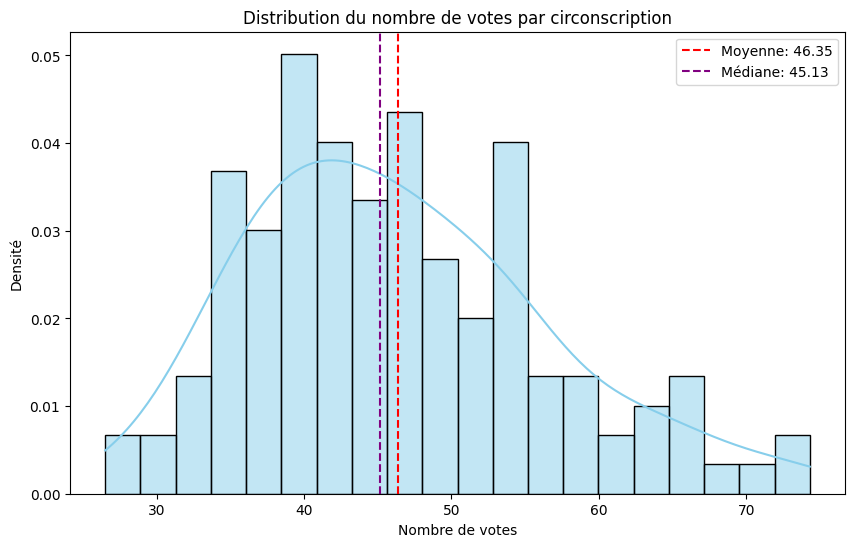

In [25]:
# On note que la moyenne ressemble à la médiane, ce qui laisse croire qu'on a quelque chose pas trop loin d'une courbe 
# normale. Ceci dit on regarde ici le taux de vote pour le vainqueur dans une circonscription

plt.figure(figsize=(10, 6))
sns.histplot(vainqueurs_2018['Taux de vote'], kde=True, stat="density", bins=20, color='skyblue')

# Ajouter une ligne pour la moyenne
moyenne = vainqueurs_2018['Taux de vote'].mean()
plt.axvline(moyenne, color='red', linestyle='--', label=f'Moyenne: {moyenne:.2f}')
mediane = vainqueurs_2018['Taux de vote'].median()
plt.axvline(mediane, color='purple', linestyle='--', label=f'Médiane: {mediane:.2f}')

plt.title("Distribution du nombre de votes par circonscription")
plt.xlabel("Nombre de votes")
plt.ylabel("Densité")
plt.legend()
plt.show()

In [26]:
# On constate qu'il y a une asymétrie avec un coefficient positif.

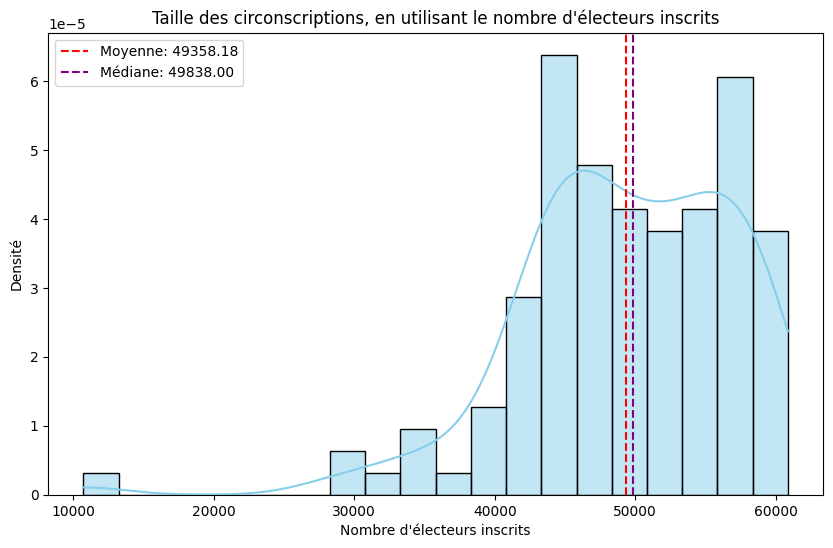

In [27]:
# Autre chose intéressante à explorer : la taille des circonscriptions.

plt.figure(figsize=(10, 6))
sns.histplot(circonscriptions_2018['Nombre d\'électeurs inscrits'], kde=True, stat="density", bins=20, color='skyblue')

# Ajouter une ligne pour la moyenne
moyenne = circonscriptions_2018['Nombre d\'électeurs inscrits'].mean()
plt.axvline(moyenne, color='red', linestyle='--', label=f'Moyenne: {moyenne:.2f}')
mediane = circonscriptions_2018['Nombre d\'électeurs inscrits'].median()
plt.axvline(mediane, color='purple', linestyle='--', label=f'Médiane: {mediane:.2f}')

plt.title("Taille des circonscriptions, en utilisant le nombre d'électeurs inscrits")
plt.xlabel("Nombre d'électeurs inscrits")
plt.ylabel("Densité")
plt.legend()
plt.show()

In [28]:
# Parmis les critères qu'utilisent la Commission de la représentation électorale il y a entre autres l'aspect
# du nombre d'électeurs qui doit être le plus équitable possible.  Ce n'est pas surprenant donc que la majorité
# des circonscriptions se retrouvent à plus ou moins 10 000 électeurs de la moyenne.
# Mais qu'elles sont les circonscriptions sous la barre des 40 000 électeurs?

circonscriptions_moins_40000_2018 = circonscriptions_2018[circonscriptions_2018['Nombre d\'électeurs inscrits'] < 40000].sort_values(by='Nombre d\'électeurs inscrits', ascending=False)
print(circonscriptions_moins_40000_2018[['Nom de la circonscription', 'Nombre d\'électeurs inscrits']])

    Nom de la circonscription  Nombre d'électeurs inscrits
82          Nicolet-Bécancour                        39995
74                   Mégantic                        38856
33                  Duplessis                        37349
13                Bonaventure                        35530
1               Abitibi-Ouest                        35339
0                 Abitibi-Est                        33770
90              René-Lévesque                        32944
35                      Gaspé                        30033
116                    Ungava                        28314
44       Îles-de-la-Madeleine                        10729


In [29]:
# Il faudrait examiner une par une ces circonscriptions pour comprendre pourquoi celles-ci sont à ce point plus petites
# que la moyenne, mon hypothèse est que la situation géographique et les divisions administratives ont été des 
# facteurs déterminants (je sais que c'est le cas notamment pour les Îles-de-la-Madelaine, considéré comme une 
# circonscription "protégée").  On notera que par rapport à l'élection générale précédente, il y en a moins, des
# correctifs ont donc été appliqués (ce qui expliquera au moins en partie la différence dans la liste de de circonscriptions
# lorsqu'on comparera les élections entre elles plus tard.

In [30]:
# Quels sont les partis ayant remporté un nombre appréciable de votes dans chaque circonscriptions?  Disons au moins 5%.
# Au départ, pour tout le Québec, on a le portrait suivant : 

total_votes = total_votes_parparti_2018.sum()
print((total_votes_parparti_2018 / total_votes) * 100)

Parti politique
A.P.Q.            0.012917
B.P.              0.115457
C.A.Q.-É.F.L.    37.422605
C.I.N.Q.          0.017181
C.P.Q.            0.341338
Ind               0.160207
N.P.D.Q.          0.566822
P.C.Q./C.P.Q.     1.464099
P.Cu.Q.           0.004190
P.L.              0.041601
P.L.Q./Q.L.P.    24.817840
P.M.L.Q.          0.042345
P.N.              0.090714
P.Q.             17.056862
P.V.Q./G.P.Q.     1.682642
P51               0.027693
Q.S.             16.102563
V.P.              0.004711
É.A.              0.028213
Name: Nombre total de votes, dtype: float64


In [31]:
candidats_plusdecinq = votes_candidats_2018[votes_candidats_2018['Taux de vote'] > 5]
candidats_plusdecinq = candidats_plusdecinq.drop(columns=['Numéro du parti politique', 'Nombre de votes en avance', 'Numéro du candidat'])    

print(candidats_plusdecinq)

     Numéro de la circonscription              Nom     Prénom Parti politique  \
0                             648           Dufour     Pierre   C.A.Q.-É.F.L.   
1                             648         Larouche  Élizabeth            P.Q.   
2                             648        Bourgeois        Guy   P.L.Q./Q.L.P.   
3                             648              Cyr       Lyne            Q.S.   
6                             642            Blais    Suzanne   C.A.Q.-É.F.L.   
..                            ...              ...        ...             ...   
927                           476  Trottier-Gascon   Caroline            Q.S.   
933                           332        Maccarone   Jennifer   P.L.Q./Q.L.P.   
934                           332        Piskunova  Ekaterina            Q.S.   
935                           332            Morin   Michelle   C.A.Q.-É.F.L.   
936                           332           Benoit  J. Marion            P.Q.   

     Nombre total de votes 

In [32]:
# Tentons d'avoir une vue d'ensemble, comme par exemple, extraire la liste des partis ayant eu au moins 
# 5% des voix dans une circonscriptions

partis_aumoinscinq = candidats_plusdecinq['Parti politique'].unique()
print(partis_aumoinscinq)

['C.A.Q.-É.F.L.' 'P.Q.' 'P.L.Q./Q.L.P.' 'Q.S.' 'Ind' 'P.C.Q./C.P.Q.'
 'P.V.Q./G.P.Q.']


In [33]:
# On note qu'il y a eut au moins un candidat indépendant qui a reçu un nombre intéressant de votes,
# tentons de les identifier.

print(candidats_plusdecinq[candidats_plusdecinq['Parti politique'] == "Ind"])

    Numéro de la circonscription       Nom Prénom Parti politique  \
32                           520  St-Denis   Yves             Ind   

    Nombre total de votes  Taux de vote  
32                   1778          5.83  
